## <span style="color:green"><h1><center>DEM HPC Processing</center></h1></span>
<center>Prepared by <br>
    <b>Noah Oller Smith, Rajesh Kalyanam, Jibin Joseph and Venkatesh Merwade</b><br> 
Lyles School of Civil Engineering, Purdue University<br>
vmerwade@purdue.edu<br>
<b><br>
    FAIR Science in Water Resources</b><br></center>


## <span style="color:green">Objective</span>
<p style='text-align: justify;'> The objective of this tutorial is to peform the accessing and processing of DEM data for larger watershed and/or with resolution. We will input the site ID, resolution and this tutorial will give you back clipped raster for any regions across CONUS.</p> 

In [2]:
## Let's try higher resolution of 1/3 arc-second
site_id = '04180000'
resolution = '13'

In [3]:
params_dem_fetch = {"site_id": site_id,
                    "resolution": resolution}
params_dem_fetch

{'site_id': '04180000', 'resolution': '13'}

## <span style="color:green">HPC tool</span>
<p style='text-align: justify;'> TWe will use Cyber GIS comupte tool from UIUC</p> 

In [4]:
import cybergis_compute_client
from cybergis_compute_client import CyberGISCompute
import os

## <span style="color:green">Step 1: Access DEM raster tiles to cover the watershed corresponding for given site_id and resolution</span>
<p style='text-align: justify;'> </p> 

In [5]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="Watershed_DEM_Raster_Connector", input_params=params_dem_fetch)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as joseph57@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING</span>
<p style='text-align: justify;'> </p> 

In [6]:
## Collect the job id from previous job
jobid_dem_connector = cybergis.job.id
jobid_dem_connector

'16964351498HDUc'

## <span style="color:green">Step 2: Merge the downloaded DEM raster tiles </span>
<p style='text-align: justify;'> </p> 

In [9]:
params_dem_merge = {"input_path": jobid_dem_connector,
                    "merged_filename": f'merged_{resolution}_{site_id}'}
params_dem_merge

{'input_path': '16964351498HDUc', 'merged_filename': 'merged_13_04180000'}

In [10]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="DEM_Raster_Merging_Processor", input_params=params_dem_merge)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as joseph57@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING</span>
<p style='text-align: justify;'> </p> 

In [11]:
## Collect the job id from previous job
jobid_dem_merge = cybergis.job.id
jobid_dem_merge

'16964353460Txjq'

## <span style="color:green">Step 3: Reproject the watershed shapefile and merged raster tile to projected coordinate system </span>
<p style='text-align: justify;'> </p> 

In [13]:
params_dem_reproject = {"raster_path": jobid_dem_merge,
                        "site_id": site_id,
                        "resolution": resolution}
params_dem_reproject

{'raster_path': '16964353460Txjq', 'site_id': '04180000', 'resolution': '13'}

In [14]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="DEM_Raster_Reprojection_Processor", input_params=params_dem_reproject)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as joseph57@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING</span>
<p style='text-align: justify;'> </p> 

In [15]:
## Collect the job id from previous job
jobid_dem_reproject = cybergis.job.id
jobid_dem_reproject

'1696435484J54Xn'

## <span style="color:green">Step 4: Clip the reprojected raster tile using the projected watershed shapefile </span>
<p style='text-align: justify;'> </p> 

In [17]:
params_dem_clip = {"raster_path": jobid_dem_reproject,
                   "site_id": site_id,
                   "resolution": resolution}
params_dem_clip

{'raster_path': '1696435484J54Xn', 'site_id': '04180000', 'resolution': '13'}

<h4 style="color:red;"> User Interaction Required </h4>

- Run the cell below 
- Click on "Submit Job" on the "Your Job Status" tabpage 
- Wait until Job is finished (2-3 mins)
- Switch to "Download Job Result" tabpage
- Choose "/" and click on Download
- Wait until downloading is finished
- Proceed to the next cell

In [18]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="DEM_Raster_Clipping_Processor", input_params=params_dem_clip)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as joseph57@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">VERY IMPORTANT. THERE ARE TWO STEPS HERE AS FOLLOWS: 
1. WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING
2. GO TO "DOWNLOAD JOB ..." TAB AND CLICK DOWNLOAD TO SAVE THE FILE LOCALLY FOR PLOTTING</span>
<p style='text-align: justify;'> </p>

In [19]:
clipped_output = cybergis.recentDownloadPath
clipped_output
if not os.path.isfile(os.path.join(clipped_output, f'clipped_raster_{site_id}.tif')):
    display(HTML('<h4 style="color:red;">It appears you did not download the job results per instruction above, please double check!</h4>'))

## <span style="color:green">Step 5: Visualize the clipped raster data </span>

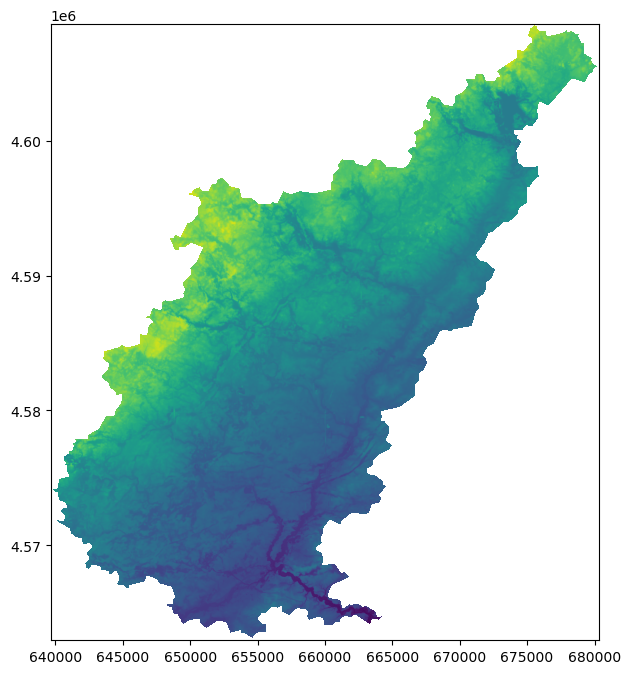

In [21]:
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot

fig, ax = plt.subplots(figsize=(8, 8))

clipped_raster_output = cybergis.recentDownloadPath
local_raster_filename=fr'{clipped_raster_output}/clipped_raster_{site_id}.tif'
raster = rasterio.open(local_raster_filename)
rasterio.plot.show(raster,
                   ax=ax,
                   cmap='viridis')
## Free up memory
del raster
del fig,ax

## <span style="color:green">We are done. Congra </span>